# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = 'C:\\Users\\ricar\\OneDrive\\Escritorio'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255, #obligatorio
							#rotation_range = 40,
							#width_shift_range = 0.2,
							#height_shift_range = 0.2,
							#shear_range = 0.3,
							#zoom_range = 0.3,
							#horizontal_flip = True
							)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical'
							)

Found 11250 images belonging to 3 classes.


In [2]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation="relu", input_shape = (150,150,3), padding='same'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D())
#model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
#model.add(layers.MaxPooling2D())
#model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
#model.add(layers.MaxPooling2D())
#model.add(layers.Conv2D(256, (3, 3), activation="relu", padding='same'))
#model.add(layers.MaxPooling2D())
#model.add(layers.Conv2D(512, (3, 3), activation="relu", padding='same'))
#model.add(layers.MaxPooling2D())
#model.add(layers.Conv2D(1028, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPooling2D())
#model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
#model.add(layers.Dense(256,activation='relu'))
#model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(3,activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['acc'])


c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,475 (1.29 MB)

 Trainable params: 337,475 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
  22/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.3256 - loss: 1.1267

c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.7716 - loss: 0.5232
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.9482 - loss: 0.1591
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.9658 - loss: 0.1075
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.9715 - loss: 0.0774
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.9821 - loss: 0.0511
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.9870 - loss: 0.0382
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.9872 - loss: 0.0344
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.9859 - loss: 0.0385
Epoch 9/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.9910 - loss: 0.0285
Epoch 10/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.9913 - loss: 0.0254
Epoch 11/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.9905 - loss: 0.0265
Epoch 12/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.9924 - loss: 0.0246
Epoch 1

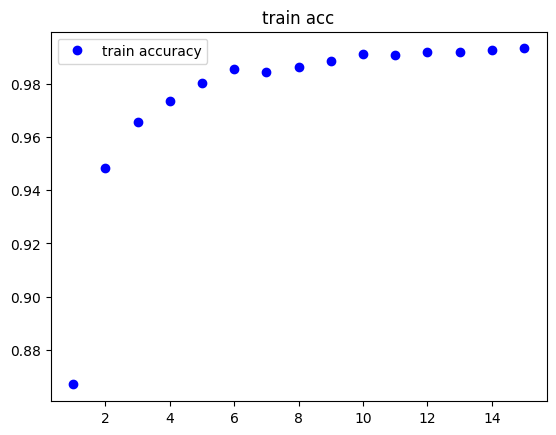

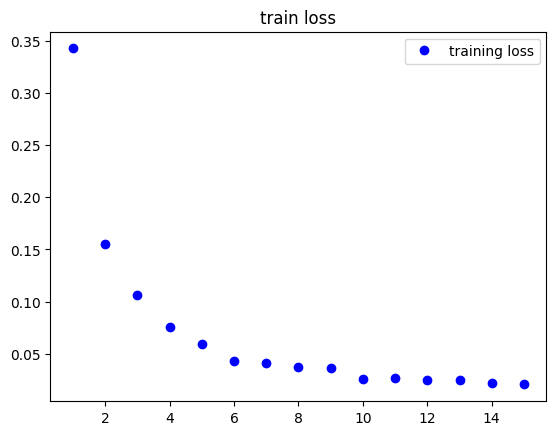

In [3]:
history = model.fit(
						train_generator,
						epochs = 15)


acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 1,
					class_mode= 'categorical')

test_loss_original, test_acc_original = model.evaluate(test_generator)
print('\ntest acc :\n', test_acc_original)


Found 3750 images belonging to 3 classes.
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.9484 - loss: 0.2540

test acc :
 0.9477333426475525


[0.8669333457946777, 0.9483555555343628, 0.9657777547836304, 0.9735110998153687, 0.9801777601242065, 0.9857777953147888, 0.9846222400665283, 0.9864888787269592, 0.9887111186981201, 0.9911110997200012, 0.990933358669281, 0.9920889139175415, 0.9921777844429016, 0.992888867855072, 0.9933333396911621]
[0.3427744209766388, 0.1554178148508072, 0.10624521225690842, 0.07598596066236496, 0.05938341096043587, 0.043253663927316666, 0.04060736298561096, 0.03683968260884285, 0.03610493615269661, 0.025535134598612785, 0.0266866572201252, 0.025069644674658775, 0.025097111240029335, 0.021822242066264153, 0.02042868733406067]
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.9463 - loss: 0.2470

test acc :
 0.9477333426475525

test loss :
 0.25971466302871704
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


(3750, 3)

<Figure size 640x480 with 0 Axes>

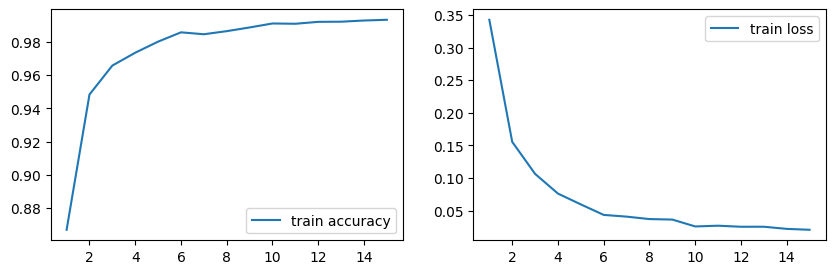

In [5]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2, figsize=(10, 3))
axarr[0].plot(epochs,acc,label='train accuracy')
axarr[0].legend()
axarr[1].plot(epochs,loss,label='train loss')
axarr[1].legend()


print(acc)
print(loss)

test_loss, test_acc = model.evaluate(test_generator)
print('\ntest acc :\n', test_acc)
print('\ntest loss :\n', test_loss)

predictions = model.predict(test_generator)
predict_class = (predictions > 0.5).astype("int32")
predict_class.shape

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print('\ntest acc :\n', test_acc)
print('\ntest loss :\n', test_loss)

model.save('C:\\Users\\ricar\\OneDrive\\Escritorio\\ModeloGuardadoCategorical.h5')

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.9431 - loss: 0.2701



test acc :
 0.9477333426475525

test loss :
 0.2597145736217499
